In [263]:
%matplotlib inline
from math import log
from arpes.analysis.band_analysis_utils import param_getter, param_stderr_getter

# Introduction to Python

You can follow along even if you don't have the ARPES code installed, just open your system Python,
or go to [goo.gl/hXA8by](goo.gl/hXA8by)

# Agenda

## Getting started
1. Why consider Python?
2. Introduction to the ethos (zen) of Python
3. Refresher on data + working in Python

## ARPES Analysis

1. How to load and prep data (moments of brief terminal usage)
2. Data exploration
3. Curve fitting
4. Comparing data
5. Producing figures
6. Walkthrough of code structure, contributing, etc.

# Why Python?

1. Industry standard for data science ([https://goo.gl/VPTDJF](https://goo.gl/VPTDJF)) and software generally
2. 130,000+ user contributed packages
3. Simple: "Language fits in your head"
4. Mature software with lots of financial support
5. Free

In [86]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Maxims

1. Simple is better than complex
2. Special cases aren't special enough to break the rules
3. There should be one--and preferably only one--obvious way to do it

You can use these as rules to keep a level head as you explore Python

## Strings + Numbers

In [87]:
# simple math
2 + 2

4

In [283]:
# differences between float and int math
print(2 ** 200)
print(2. ** 200)

1606938044258990275541962092341162602522202993782792835301376
1.6069380442589903e+60


In [100]:
2. ** 200

1.6069380442589903e+60

In [93]:
# division
3 / 5

0.6

In [103]:
# you can inspect the type of data with the `type` function
type(2)

int

In [104]:
type(2.)

float

In [105]:
2 + 2.

4.0

In [109]:
# complex numbers available
j = 5
(3 + 4j).conjugate()
# conjugate

(3-4j)

In [285]:
# math with strings
s = "my string"
t = 'another one' 
# addition
print(s + t)
# multiplication
print(s * 5)

my stringanother one
my stringmy stringmy stringmy stringmy string


In [286]:
# conversion
from math import ceil, floor # <- imports these names out of the module 'math' can also do
# import math; math.ceil(2.51)
print(ceil(2.51))
print(floor(2.51))
round(2.51)

3
2


3

## Collections

In [290]:
# lists <-> Core abstraction for index collection of data

crazy_shopping_list = ["Veggies", 3.14159265, ["Milk", "Butter", "Eggs"]]

# Note: lists are "dynamically" typed
# Note also: zero indexing
crazy_shopping_list[0]

'Veggies'

In [291]:
# Need some way of getting stuff out too!
# You can think of lists like mailboxes:
# crazy_shopping_list:
#  ____________________________________________________
# |     0     |     1      |            2             |
# -----------------------------------------------------
# | "Veggies" | 3.14159265 |["Milk", "Butter", "Eggs"]|
# -----------------------------------------------------

crazy_shopping_list[1]

3.14159265

In [292]:
# strings act kinda like lists too

In [293]:
# dictionaries
lab_roles = {
    'Claudia': 'Postdoc',
    'Sam': 'Graduate Student',
    'Bruin': 'Undergraduate',
}
lab_roles['Sam']

'Graduate Student'

In [297]:
# Lookups with defaults

#             Look for       default
lab_roles.get('Conrad', 'Some kinda human.')

'Some kinda human.'

In [308]:
# simple data transformations + data comprehensions

# Idea is same as set comprehension in mathematics

# [rule to produce new data <- initial data]

# structure:
# [rule(value) for value in list_of_values]

# Simple example:
[2 * x for x in [1, 2, 3]]

[2, 4, 6]

In [309]:
# Q. Convert list of numbers to strings
print([str(x) for x in range(20)])
# Q. How long is the representation of 2 ^ j for j = 1 .. 1000?
print([len(str(2 ** x)) for x in range(1000)])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 66, 66, 66, 66, 67, 67, 67, 68, 68, 68, 69, 69, 69, 69

In [298]:
# Out of bounds for lists
test = [1]
test[2]

IndexError: list index out of range

In [299]:
# Out of bounds for dictionaries
lab_roles['Conrad']

KeyError: 'Conrad'

In [302]:
# Try out indexing with negative numbers
another_list = list(range(20)) # 0, 1, ... 18, 19
print(another_list[-1])
print(another_list[::-1])

19
[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


## Modules

In [150]:
# arpes.analysis.band_analysis.fit_patterned_bands
from math import ceil

### Plenty of useful modules

```
math, collections, functools, itertools, os, sys, time
```

Many more written by users/scientific groups:

```
scipy, numpy, matplotlib, etc...
```

# Interlude: Where to get Help?

### By declining merit:

1. Humans
2. Interactive Python session (play with the data)
3. `help()`
4. StackOverflow/Google
5. python.org/doc

# Functions

In [156]:
# Ways of organizing functionality
# Defining them
'This is a sentence.'.split('t')

['This is a sen', 'ence.']

In [165]:
# Calling them
def f(a):
    return a + 2

In [168]:
my_val = f(5)
my_val + 2

9

In [176]:
# Keyword arguments

def tries_FLT(n=2, a=0, b=0, c=0):
    if not isinstance(n, int):
        print('Not fair.')
        return
    if a**n + b**n == c**n:
        if n > 2:
            print("WHAT!!?!!??!")
            print("Oh... abc = " + str(a * b * c))
        elif n == 2:
            print("Congratulations... who do you think you are, Pythagoras?")
        else:
            print("So you can add...")
    else:
        print("Sorry!")

In [177]:
# some test cases:
tries_FLT(n=4.2, a=3, b=0, c=3)

Not fair.


# ARPES

In [312]:
# Showing datasets
CONFIG['WORKSPACE'] = 'ptype_fluence' # set workspace if needed

In [311]:
default_dataset().head() # just truncating output here

,#_frames,beta_abd,binding_energy,delay,id,location,pass_energy,path,phi,photo_current,...,slit_#,spectrum_type,temperature,theta,time,x,y,z,ref_map,ref_id
file,,,,,,,,,,,,,,,,,,,,,
27,100,0,0.2,100ps,126bd4b4-39f3-11e8-bbf7-6c40088ef8e6,MC,5,/Users/chstansbury/Research/lanzara/data/ptype...,32,NaN,...,1,dataset,270.0,-5,NaN,-0.353,41.073,1.398,,
28,100,0,0.2,100ps,1270a946-39f3-11e8-bd1e-6c40088ef8e6,MC,5,/Users/chstansbury/Research/lanzara/data/ptype...,32,NaN,...,1,dataset,111.0,-5,NaN,-0.353,41.073,1.398,,
29,50,0,0.2,-200:10:800ps,12713918-39f3-11e8-8f1e-6c40088ef8e6,MC,5,/Users/chstansbury/Research/lanzara/data/ptype...,32,NaN,...,1,dataset,84.0,-5,NaN,-1.085,41.250,1.406,,
30,50,0,0.2,-200:10:800ps,1271cac2-39f3-11e8-bcd0-6c40088ef8e6,MC,5,/Users/chstansbury/Research/lanzara/data/ptype...,32,NaN,...,1,dataset,84.0,-5,NaN,-0.353,41.250,1.406,,
31,50,0,0.2,-200:10:800ps,1272b180-39f3-11e8-9ca5-6c40088ef8e6,MC,5,/Users/chstansbury/Research/lanzara/data/ptype...,32,NaN,...,1,dataset,84.0,-5,NaN,-0.353,41.250,1.406,,


In [22]:
# Conventions around where data goes
# What if there's more than one spreadsheet?

# For now talk to Conrad

In [314]:
# Loading file 40 out of spectrum
f40 = simple_load(40)

/Users/chstansbury/PycharmProjects/python-arpes/arpes/io.py:207: UserWarning:

Could not fetch cleave information.



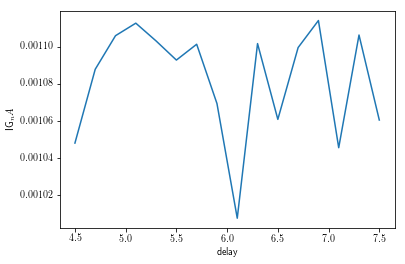

In [315]:
# Plotting photocurrent
f40.IG_nA.plot()

In [316]:
# Normalizing by photocurrent
(f40 / f40.IG_nA)

<xarray.Dataset>
Dimensions:    (delay: 16, eV: 354, phi: 212)
Coordinates:
  * delay      (delay) float64 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 ...
  * phi        (phi) float64 -0.6327 -0.6283 -0.624 -0.6196 -0.6152 -0.6109 ...
  * eV         (eV) float64 -0.7214 -0.7159 -0.7104 -0.7049 -0.6995 -0.694 ...
Data variables:
    IG_nA      (delay) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    spectrum   (delay, phi, eV) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time       (delay) float64 0.0 4.522e+03 8.751e+03 1.304e+04 1.747e+04 ...
    delay-var  (delay) float64 4.294e+03 4.32e+03 4.431e+03 4.583e+03 ...

## Data exploration

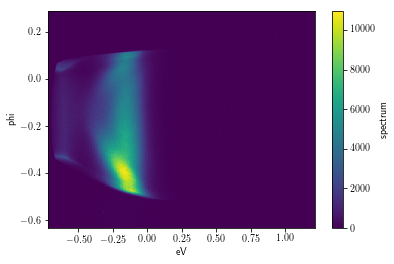

In [318]:
# Looking at data: .plot
f40.spectrum.sum('delay').plot()

In [322]:
# Selecting data

# single slice
f40.sel(delay=5, method='nearest')

# range
f40.sel(eV=slice(-0.3, 0.2)) # from -300 meV to 200 meV

print()

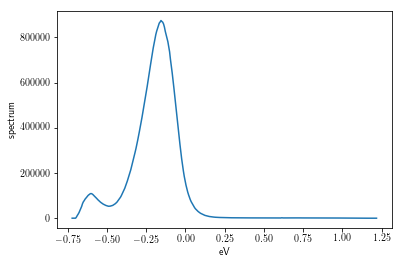

In [326]:
# summing
f40.sum('delay')

f40.sum(['delay', 'phi']).spectrum.plot()

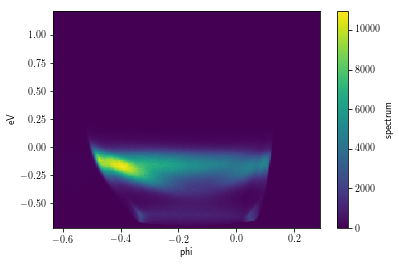

In [328]:
# transposing
f40.sum('delay').spectrum.transpose()

# can also specify axes

f40.transpose('eV', 'phi', 'delay').sum('delay').spectrum.plot()

In [217]:
# Okay but really looking at data: .S.show
(f40 / f40.IG_nA).spectrum.transpose('phi', 'eV', 'delay').S.show()

{'color_maps': {}, 'data': None, 'figures': {}, 'plots': {}, 'widgets': {}}

In [23]:
# iterating and rebinning

In [223]:
# make more granular along eV, phi
rebin(f40.spectrum, reduction={'eV': 5, 'phi': 3}).S.show()

{'color_maps': {}, 'data': None, 'figures': {}, 'plots': {}, 'widgets': {}}

## Curve Fitting

In [78]:
# Fermi edge fitting
n40 = f40.sel(phi=slice(-0.5, 0.1)).transpose('phi', 'eV', 'delay').sel(eV=slice(-0.2, None))
fit_results = broadcast_model(GStepBModel, rebin(n40.spectrum, reduction={'phi': 3}), ['phi', 'delay'])
# fit finite temperature Fermi edges over phi, delay

In [247]:
data = rebin(sn40.sel(phi=slice(-0.5, 0.1), eV=slice(-0.2, None)), phi=3)
results = broadcast_model(GStepBModel, data, ['delay', 'phi'])

HBox(children=(IntProgress(value=0, description='Fitting', max=720), HTML(value='')))

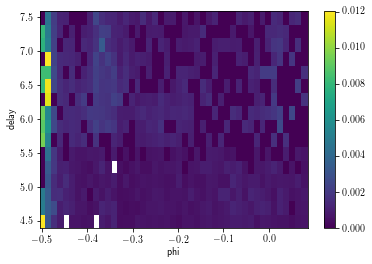

In [264]:
fit_centers = results.G.map(param_getter('center'))
(fit_centers - fit_centers.sel(delay=slice(4.5, 5)).mean('delay')).plot()

In [329]:
# can also get errors: use param_stderr_getter

fit_errors = results.G.map(param_stderr_getter('width')) # fit errors on the edge width

In [333]:
# inspecting fits
data = sn40.sel(phi=slice(-0.5, 0.1), eV=slice(-0.2, None))
results_one = broadcast_model(GStepBModel, data.sum('phi'), 'delay')
results_one.F.show()

HBox(children=(IntProgress(value=0, description='Fitting', max=16), HTML(value='')))

{'color_maps': {}, 'data': None, 'figures': {}, 'plots': {}, 'widgets': {}}

In [270]:
# Band tool, still very new, talk to Conrad if you are confused/run into issues/want more features
ctx = s40.sum('delay').S.show_band_tool()

In [341]:
# fit can be used from context (you can name this variable whatever you want)
# If the fits don't work so well, you can modify your initial conditions above and try again
results = ctx['fit']()


HBox(children=(IntProgress(value=0, description='fitting', max=212), HTML(value='')))

In [342]:
results.F.show()

{'color_maps': {}, 'data': None, 'figures': {}, 'plots': {}, 'widgets': {}}

## $k$-Space Conversion

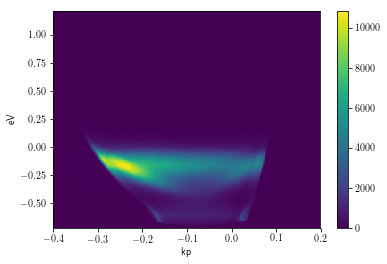

In [346]:
# You can put columns in your spreadsheet for polar angle, some spectrometers
# already record them
s40 = f40.spectrum
s40.attrs['polar'] = 0
s40.attrs['hv'] = 5.93
convert_to_kspace(s40).sum('delay').plot()

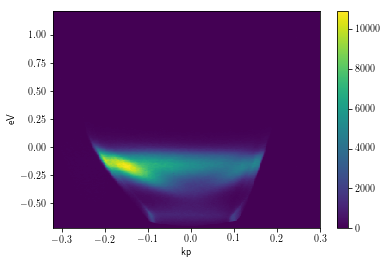

In [344]:
# Wait that doesn't look like Gamma...
s40.attrs['symmetry_points']  = {'G': {'phi': -0.15}}
convert_to_kspace(s40).sum('delay').plot()

# Plotting + Figure-craft

In [41]:
# Lots of tools available, custom + available through libraries, will only
# go over a few

In [349]:
# .S.* 
# don't remember the methods? Tab complete or let's use dir(...)
dir(s40.S) # lots of shit if you print this
[p for p in dir(s40.S) if 'plot' in p]

['_referenced_scans_for_hv_map_plot',
 '_referenced_scans_for_map_plot',
 '_simple_spectrum_reference_plot',
 'cut_dispersion_plot',
 'dispersion_plot',
 'fermi_edge_reference_plot',
 'fs_plot',
 'isosurface_plot',
 'reference_plot',
 'subtraction_reference_plot']

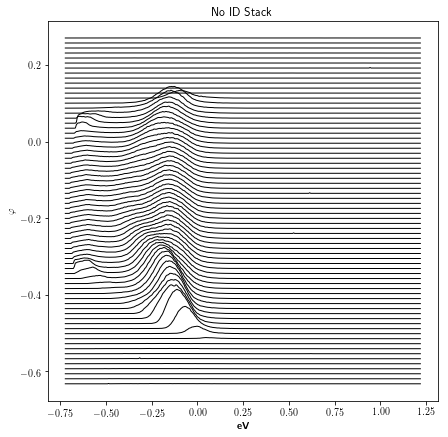

(<matplotlib.figure.Figure at 0x13592c128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13591fd68>)

In [275]:
# Stack plots
stack_dispersion_plot(s40.sum('delay'), scale_factor=0.1)

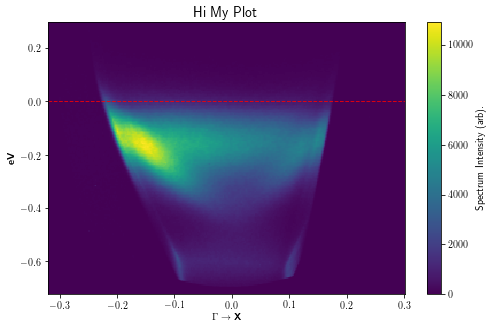

In [280]:
# Fancy dispersion plots
convert_to_kspace(s40).sum('delay').sel(eV=slice(None, 0.3)).S.dispersion_plot(title='Hi My Plot')

In [ ]:
# Cut dispersion
help(cut_dispersion_plot)

In [ ]:
# References onto maps/photon energy scans
help(make_reference_plots)

In [350]:
# Triangulated surfaces -> return to fermi fit data
# you need to do a little work to get plotly working
plotly_trisurf(fit_centers)

Lots more in module: arpes.plotting

### Modifying Figures

Customization through arguments

Modifying returned axes

Details depend on library, check out [Matplotlib](https://matplotlib.org/) or others: Bokeh, Plotly, Seaborn, Holoviews 

## Code Walkthrough

To Gitlab!